In [73]:
import pandas as pd
import geopandas as gpd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from pyproj import Transformer
import requests
import plotly.graph_objects as go


In [74]:
weer_api = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\apidata_2021.csv")
weer= pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\weerstations_noordholland.csv", sep= ";")
weer = gpd.GeoDataFrame(weer, geometry=gpd.GeoSeries.from_wkt(weer['WKT']))
weer['STN']=weer['STN_y']
weer.drop(columns=['WKT', 'STN_x', 'STN_y'], inplace=True)
hectointervallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectointervallen.txt") 
hectointervallen = hectointervallen[hectointervallen.nunique()[hectointervallen.nunique() != 1].index]
hectopunten = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\hectopunten.txt") 
hectopunten = hectopunten[hectopunten.nunique()[hectopunten.nunique() != 1].index]
juncties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\juncties.txt") 
juncties = juncties[juncties.nunique()[juncties.nunique() != 1].index]
puntlocaties = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Netwerkgegevens\puntlocaties.txt") 
puntlocaties = puntlocaties[puntlocaties.nunique()[puntlocaties.nunique() != 1].index]
ongevallen = pd.read_csv(r"C:\Users\tjibb\Documents\school\jaar_3\minor\eind_prestentatie\verkeer\PGS0112-o-CSV-bestand-J-1-N-N-N\Ongevallengegevens\ongevallen.txt", encoding="ISO-8859-15")
ongevallen = ongevallen[ongevallen.nunique()[ongevallen.nunique() != 1].index]
ongevallen.drop(columns=['PVOPGEM', 'WVL_ID','WVG_ID', 'WVG_AN', 'WDK_ID', 'WDK_AN',
                         'LGD_ID', 'BZD_ID_VM1','BZD_ID_VM2', 'BZD_ID_VM3', 'BZD_VM_AN', 'BZD_ID_IF1', 'BZD_ID_IF2',
                         'BZD_ID_IF3', 'BZD_IF_AN', 'BZD_ID_TA1', 'BZD_ID_TA2', 'BZD_ID_TA3', 'HUISNUMMER'], inplace=True)


C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3399033372.py:14: DtypeWarning:

Columns (1,24,39) have mixed types. Specify dtype option on import or set low_memory=False.



In [75]:
samengevoegd_df = ongevallen.merge(juncties, on='JTE_ID', how='left')
samengevoegd_df['FK_VELD5']=samengevoegd_df['FK_VELD5_y']
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
samengevoegd_df = samengevoegd_df.merge(puntlocaties, on='FK_VELD5', how='left')
df= samengevoegd_df
samengevoegd_df = df[df.nunique()[df.nunique() != 1].index]
samengevoegd_df.drop(columns=['AP4_CODE', 'AP5_CODE', 'FK_VELD5_y', 'X_COORD_y', 'Y_COORD_y', 
                              'ANTL_SLA', 'ANTL_DOD', 'ANTL_GZH', 'DATUM_VKL', 'DAG_CODE', 'MND_NUMMER',
                              'TIJDSTIP', 'UUR', 'DDL_ID', 'DAGTYPE', 'WEEKNR',
                              'ANTL_SEH','ANTL_GOV','ANTL_TDT', 'MNE_CODE', 'ZAD_ID', 'WGD_CODE_2',
                              'IND_ALC'], inplace=True)

df= samengevoegd_df
# df.columns
df2=df[['X_COORD_x', 'Y_COORD_x', 'VKL_NUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID', 'BEBKOM', 'WGD_CODE_1']]
df2['X']=df2['X_COORD_x']
df2['Y']=df2['Y_COORD_x']
df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3343418178.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3343418178.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3343418178.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [76]:
samengevoegd_df.columns

Index(['VKL_NUMMER', 'REGNUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID',
       'NIVEAUKOP', 'WSE_ID', 'BEBKOM', 'MAXSNELHD', 'WGD_CODE_1', 'JTE_ID',
       'WVK_ID', 'HECTOMETER', 'FK_VELD5_x', 'GME_ID', 'GME_NAAM', 'PVE_CODE',
       'PVE_NAAM', 'KDD_NAAM', 'PLT_NAAM', 'DIENSTCODE', 'DIENSTNAAM',
       'DISTRCODE', 'DISTRNAAM', 'WBRSRT_R', 'WBRSRT_P', 'WBRSRT_G',
       'WBRSRT_W', 'WBRSRT_T', 'ANTL_TAK', 'ACTUEEL', 'SLE_TYPE', 'SLE_NUMMER',
       'FK_VELD5', 'X_COORD_x', 'Y_COORD_x'],
      dtype='object')

In [77]:
trans = Transformer.from_crs("ETRS89", "EPSG:4326", always_xy=True)
xx, yy = trans.transform(df2["X"].values, df2["Y"].values)

df2["X"] = xx
df2["Y"] = yy
df2["X"] = (df2["X"]/64000)+3
df2["Y"] = (df2["Y"]/110000)+48
# df2.drop(columns=['X_COORD_x', 'Y_COORD_x'], inplace=True)

df2=df2[['X', 'Y', 'VKL_NUMMER', 'AP3_CODE', 'ANTL_PTJ', 'AOL_ID', 'BEBKOM', 'WGD_CODE_1']]
df2.dropna()
gdf = gpd.GeoDataFrame(
    df2, geometry=gpd.points_from_xy(df2.X, df2.Y))
gdf.dropna()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3967659008.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3967659008.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\3967659008.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

,X,Y,VKL_NUMMER,AP3_CODE,ANTL_PTJ,AOL_ID,BEBKOM,WGD_CODE_1,geometry
8,5.698422,51.700464,20210000435,DOD,2,7,BI,D,POINT (5.69842 51.70046)
16,5.440999,51.761055,20210000567,DOD,2,7,BU,D,POINT (5.44100 51.76105)
17,6.486673,52.904554,20210000568,DOD,2,7,BU,D,POINT (6.48667 52.90455)
25,4.427013,51.588056,20210072804,UMS,2,7,BI,D,POINT (4.42701 51.58806)
29,6.990462,53.006926,20210074980,UMS,2,7,BI,D,POINT (6.99046 53.00693)
...,...,...,...,...,...,...,...,...,...
113144,5.783843,51.445289,20210027300,UMS,3,7,BU,D,POINT (5.78384 51.44529)
113147,6.821636,53.241292,20210027330,UMS,2,0,BI,D,POINT (6.82164 53.24129)
113150,4.806394,52.453405,20210027591,UMS,3,9,BI,D,POINT (4.80639 52.45340)
113151,4.558489,52.098595,20210027600,UMS,3,7,BI,D,POINT (4.55849 52.09860)


In [78]:
weer_api

,Unnamed: 0,datetime,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),station_id,Temperatuur (C),Weercode
0,0,2021-01-01 00:00:00+00:00,0.80,232.2,1005.84,123.0,0.0,6260,-2.1,0.0
1,1,2021-01-01 00:10:00+00:00,0.90,233.2,1005.84,126.0,0.0,6260,-2.0,0.0
2,2,2021-01-01 00:20:00+00:00,0.57,233.5,1005.94,109.0,0.0,6260,-2.2,0.0
3,3,2021-01-01 00:30:00+00:00,0.39,233.1,1005.94,137.0,0.0,6260,-2.3,0.0
4,4,2021-01-01 00:40:00+00:00,0.59,232.1,1005.94,142.0,0.0,6260,-2.3,0.0
...,...,...,...,...,...,...,...,...,...,...
559279,559279,2021-12-30 23:20:00+00:00,13.65,231.3,1012.47,8510.0,0.0,6242,10.5,0.0
559280,559280,2021-12-30 23:30:00+00:00,13.24,230.8,1012.57,8590.0,0.0,6242,10.5,0.0
559281,559281,2021-12-30 23:40:00+00:00,13.11,231.4,1012.37,8720.0,0.0,6242,10.6,0.0
559282,559282,2021-12-30 23:50:00+00:00,13.20,230.2,1012.37,8880.0,0.0,6242,10.5,0.0


In [79]:
weer = pd.merge(weer, weer_api, on='station_id')
weer.drop(columns=['fid', 'Unnamed: 0', 'NAME'], inplace=True)


In [80]:
# weer['datetime'] = pd.to_datetime(weer['datetime'])
# 

In [81]:

weer['datetime'] = pd.to_datetime(weer['datetime'], format='%Y-%m-%d %H:%M:%S')

weer['maand'] = weer['datetime'].dt.month
weer['dag'] = weer['datetime'].dt.day


In [82]:
weer['m/d/STN'] =weer['maand'].astype(str) + '/' + weer['dag'].astype(str)+ '/' + weer['STN'].astype(str)


In [83]:
weer.columns

Index(['LON(east)', 'LAT(north)', 'ALT(m)', 'geometry', 'station_id', 'STN',
       'datetime', 'Windsnelheid (km/h)', 'Windrichting (Graden)',
       'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)',
       'Regenval (mm/h)', 'Temperatuur (C)', 'Weercode', 'maand', 'dag',
       'm/d/STN'],
      dtype='object')

In [84]:
weer2=weer.groupby('m/d/STN')["Windsnelheid (km/h)", 'Windrichting (Graden)', 'Luchtdruk (ps)', 'Zichtbaarheid (Decimeter ver kunnen kijken)', 
                         'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN'].median()

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\216662622.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [85]:
weer3 = weer[['STN', 'geometry']]
weer3

,STN,geometry
0,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
1,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
2,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
3,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
4,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
...,...,...
559279,242,"MULTIPOLYGON (((4.75721 53.12708, 4.75766 53.1..."
559280,242,"MULTIPOLYGON (((4.75721 53.12708, 4.75766 53.1..."
559281,242,"MULTIPOLYGON (((4.75721 53.12708, 4.75766 53.1..."
559282,242,"MULTIPOLYGON (((4.75721 53.12708, 4.75766 53.1..."


In [86]:
weer3 = weer3.drop_duplicates()


In [87]:
weer3

,STN,geometry
0,260,"MULTIPOLYGON (((5.04700 52.16696, 5.04699 52.1..."
50844,240,"MULTIPOLYGON (((5.02839 52.28670, 5.02820 52.2..."
101688,225,"MULTIPOLYGON (((4.58437 52.27886, 4.58451 52.2..."
152532,209,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
203376,257,"MULTIPOLYGON (((4.56887 52.49745, 4.56924 52.4..."
254220,248,"MULTIPOLYGON (((5.27671 52.68508, 5.26938 52.6..."
305064,249,"MULTIPOLYGON (((5.06081 52.57997, 5.07205 52.5..."
355908,258,"MULTIPOLYGON (((5.37670 52.76665, 5.37769 52.7..."
406752,267,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
457596,235,"MULTIPOLYGON (((4.63317 52.75539, 4.63342 52.7..."


In [88]:
weer4 = pd.merge(weer2, weer3, on='STN')

In [89]:
weer_omtemergen= weer4

In [90]:
weer_omtemergen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4014
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Windsnelheid (km/h)                          4015 non-null   float64 
 1   Windrichting (Graden)                        4015 non-null   float64 
 2   Luchtdruk (ps)                               4015 non-null   float64 
 3   Zichtbaarheid (Decimeter ver kunnen kijken)  4015 non-null   float64 
 4   Regenval (mm/h)                              4015 non-null   float64 
 5   Temperatuur (C)                              4015 non-null   float64 
 6   Weercode                                     4015 non-null   float64 
 7   STN                                          4015 non-null   float64 
 8   geometry                                     4015 non-null   geometry
dtypes: float64(8), geometry(1)
memory usage: 313.7 KB


In [91]:
weer_omtemergen

,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),Temperatuur (C),Weercode,STN,geometry
0,3.792700,278.25,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
1,6.970620,268.75,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
2,11.510500,252.65,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
3,9.193275,328.45,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
4,9.973565,301.25,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
...,...,...,...,...,...,...,...,...,...
4010,3.070000,74.25,0.0,10850.0,0.0,14.45,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4011,1.610000,101.10,0.0,12600.0,0.0,16.00,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4012,2.350000,150.90,0.0,12900.0,0.0,18.30,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4013,3.460000,96.75,0.0,19000.0,0.0,17.75,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."


In [92]:
gdf = gdf.dropna()

In [93]:
weer4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4015 entries, 0 to 4014
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype   
---  ------                                       --------------  -----   
 0   Windsnelheid (km/h)                          4015 non-null   float64 
 1   Windrichting (Graden)                        4015 non-null   float64 
 2   Luchtdruk (ps)                               4015 non-null   float64 
 3   Zichtbaarheid (Decimeter ver kunnen kijken)  4015 non-null   float64 
 4   Regenval (mm/h)                              4015 non-null   float64 
 5   Temperatuur (C)                              4015 non-null   float64 
 6   Weercode                                     4015 non-null   float64 
 7   STN                                          4015 non-null   float64 
 8   geometry                                     4015 non-null   geometry
dtypes: float64(8), geometry(1)
memory usage: 313.7 KB


In [94]:
weer_omtemergen = gpd.GeoDataFrame(weer_omtemergen, geometry=(weer_omtemergen['geometry']))

In [95]:
gdf

,X,Y,VKL_NUMMER,AP3_CODE,ANTL_PTJ,AOL_ID,BEBKOM,WGD_CODE_1,geometry
8,5.698422,51.700464,20210000435,DOD,2,7,BI,D,POINT (5.69842 51.70046)
16,5.440999,51.761055,20210000567,DOD,2,7,BU,D,POINT (5.44100 51.76105)
17,6.486673,52.904554,20210000568,DOD,2,7,BU,D,POINT (6.48667 52.90455)
25,4.427013,51.588056,20210072804,UMS,2,7,BI,D,POINT (4.42701 51.58806)
29,6.990462,53.006926,20210074980,UMS,2,7,BI,D,POINT (6.99046 53.00693)
...,...,...,...,...,...,...,...,...,...
113144,5.783843,51.445289,20210027300,UMS,3,7,BU,D,POINT (5.78384 51.44529)
113147,6.821636,53.241292,20210027330,UMS,2,0,BI,D,POINT (6.82164 53.24129)
113150,4.806394,52.453405,20210027591,UMS,3,9,BI,D,POINT (4.80639 52.45340)
113151,4.558489,52.098595,20210027600,UMS,3,7,BI,D,POINT (4.55849 52.09860)


In [96]:
weer_omtemergen

,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),Temperatuur (C),Weercode,STN,geometry
0,3.792700,278.25,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
1,6.970620,268.75,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
2,11.510500,252.65,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
3,9.193275,328.45,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
4,9.973565,301.25,0.0,0.0,0.0,0.00,0.0,209.0,"MULTIPOLYGON (((4.52338 52.32138, 4.51242 52.3..."
...,...,...,...,...,...,...,...,...,...
4010,3.070000,74.25,0.0,10850.0,0.0,14.45,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4011,1.610000,101.10,0.0,12600.0,0.0,16.00,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4012,2.350000,150.90,0.0,12900.0,0.0,18.30,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."
4013,3.460000,96.75,0.0,19000.0,0.0,17.75,0.0,267.0,"MULTIPOLYGON (((5.13328 53.04158, 5.13740 53.0..."


In [97]:
merged_gdf = gpd.sjoin(gdf, weer_omtemergen, predicate='within')


In [98]:
merged_gdf

,X,Y,VKL_NUMMER,AP3_CODE,ANTL_PTJ,AOL_ID,BEBKOM,WGD_CODE_1,geometry,index_right,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),Temperatuur (C),Weercode,STN
394,4.771971,52.730472,20210080706,LET,2,1,BI,R,POINT (4.77197 52.73047),730,1.79000,238.60,1007.49,49900.0,0.0,4.3,0.0,235.0
398,4.778672,52.738382,20210080712,UMS,1,9,BU,D,POINT (4.77867 52.73838),730,1.79000,238.60,1007.49,49900.0,0.0,4.3,0.0,235.0
497,4.807741,52.936414,20210081452,UMS,4,7,BI,D,POINT (4.80774 52.93641),730,1.79000,238.60,1007.49,49900.0,0.0,4.3,0.0,235.0
563,4.812609,52.758818,20210082114,UMS,2,7,BI,D,POINT (4.81261 52.75882),730,1.79000,238.60,1007.49,49900.0,0.0,4.3,0.0,235.0
570,4.811406,52.742245,20210082121,UMS,3,4,BI,D,POINT (4.81141 52.74225),730,1.79000,238.60,1007.49,49900.0,0.0,4.3,0.0,235.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41852,4.527688,52.462267,20210034058,UMS,2,7,BI,D,POINT (4.52769 52.46227),364,4.11427,199.55,0.00,0.0,0.0,0.0,0.0,209.0
53741,4.517625,52.360518,20210085188,LET,2,7,BU,D,POINT (4.51762 52.36052),364,4.11427,199.55,0.00,0.0,0.0,0.0,0.0,209.0
56104,4.526193,52.323866,20210066720,UMS,2,7,BU,D,POINT (4.52619 52.32387),364,4.11427,199.55,0.00,0.0,0.0,0.0,0.0,209.0
62122,4.513559,52.337518,20210064168,LET,2,7,BU,R,POINT (4.51356 52.33752),364,4.11427,199.55,0.00,0.0,0.0,0.0,0.0,209.0


In [99]:
merged_gdf['geometry'].nunique()

3482

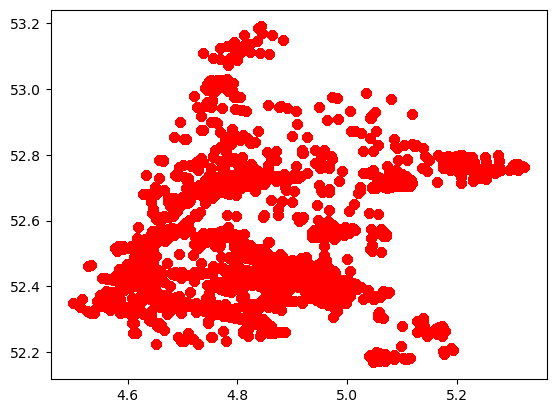

In [100]:
# Plot de punten
plt.scatter(merged_gdf['X'], merged_gdf['Y'], color='red', label='Punten')

# Toon de plot
plt.show()

In [101]:
merged_gdf.head()

,X,Y,VKL_NUMMER,AP3_CODE,ANTL_PTJ,AOL_ID,BEBKOM,WGD_CODE_1,geometry,index_right,Windsnelheid (km/h),Windrichting (Graden),Luchtdruk (ps),Zichtbaarheid (Decimeter ver kunnen kijken),Regenval (mm/h),Temperatuur (C),Weercode,STN
394,4.771971,52.730472,20210080706,LET,2,1,BI,R,POINT (4.77197 52.73047),730,1.79,238.6,1007.49,49900.0,0.0,4.3,0.0,235.0
398,4.778672,52.738382,20210080712,UMS,1,9,BU,D,POINT (4.77867 52.73838),730,1.79,238.6,1007.49,49900.0,0.0,4.3,0.0,235.0
497,4.807741,52.936414,20210081452,UMS,4,7,BI,D,POINT (4.80774 52.93641),730,1.79,238.6,1007.49,49900.0,0.0,4.3,0.0,235.0
563,4.812609,52.758818,20210082114,UMS,2,7,BI,D,POINT (4.81261 52.75882),730,1.79,238.6,1007.49,49900.0,0.0,4.3,0.0,235.0
570,4.811406,52.742245,20210082121,UMS,3,4,BI,D,POINT (4.81141 52.74225),730,1.79,238.6,1007.49,49900.0,0.0,4.3,0.0,235.0


In [102]:
merged_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1593955 entries, 394 to 72139
Data columns (total 18 columns):
 #   Column                                       Non-Null Count    Dtype   
---  ------                                       --------------    -----   
 0   X                                            1593955 non-null  float64 
 1   Y                                            1593955 non-null  float64 
 2   VKL_NUMMER                                   1593955 non-null  int64   
 3   AP3_CODE                                     1593955 non-null  object  
 4   ANTL_PTJ                                     1593955 non-null  int64   
 5   AOL_ID                                       1593955 non-null  int64   
 6   BEBKOM                                       1593955 non-null  object  
 7   WGD_CODE_1                                   1593955 non-null  object  
 8   geometry                                     1593955 non-null  geometry
 9   index_right                

In [103]:
# Selecteer de numerieke kolommen voor correlatieanalyse

numerical_columns = merged_gdf[['ANTL_PTJ', 'AOL_ID', 'Windsnelheid (km/h)','Windrichting (Graden)', 'Luchtdruk (ps)',
                     'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN']]


name = ['ANTL_PTJ', 'AOL_ID', 'Windsnelheid (km/h)','Windrichting (Graden)', 'Luchtdruk (ps)',
                     'Zichtbaarheid (Decimeter ver kunnen kijken)', 'Regenval (mm/h)','Temperatuur (C)', 'Weercode', 'STN']

# Bereken de correlatiematrix

correlation_matrix = numerical_columns.corr()


fig1 = go.Figure(data=go.Heatmap(

                   z=correlation_matrix.values,

                   x=name,

                   y=name,

                   colorscale='Blues',

                   zmin=0, zmax=1,
                   text=correlation_matrix.values, 
                   hoverongaps=True))
fig1

In [104]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import seaborn as sns

In [105]:
df=numerical_columns[['Windsnelheid (km/h)','Luchtdruk (ps)']]
df['y']=df['Windsnelheid (km/h)']
df['x']=df['Luchtdruk (ps)']
df.drop(columns=['Windsnelheid (km/h)','Luchtdruk (ps)'], inplace=True)
df

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\2703014095.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\2703014095.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\tjibb\AppData\Local\Temp\ipykernel_15680\2703014095.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

,y,x
394,1.79000,1007.49
398,1.79000,1007.49
497,1.79000,1007.49
563,1.79000,1007.49
570,1.79000,1007.49
...,...,...
41852,4.11427,0.00
53741,4.11427,0.00
56104,4.11427,0.00
62122,4.11427,0.00


In [110]:
df = df.replace(0, np.NaN)

df= df.dropna()
df

,y,x
394,1.79,1007.49
398,1.79,1007.49
497,1.79,1007.49
563,1.79,1007.49
570,1.79,1007.49
...,...,...
58269,4.76,1009.78
70456,4.76,1009.78
83212,4.76,1009.78
109078,4.76,1009.78


In [111]:
model = smf.ols(formula= 'y~x', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                 2.741e+04
Date:                Thu, 09 Nov 2023   Prob (F-statistic):               0.00
Time:                        18:04:48   Log-Likelihood:            -4.0297e+05
No. Observations:              176540   AIC:                         8.059e+05
Df Residuals:                  176538   BIC:                         8.060e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     96.0141      0.551    174.245      0.000      94.934      97.094
x             -0.0898      0.001   -165.571      0.000      -0.091      -0.089
==============================================================================
Omnibus:                    26165.555   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43081.756
Skew:                           1.008   Prob(JB):                         0.00
Kurtosis:                       4.340   Cond. No.                     9.92e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.92e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

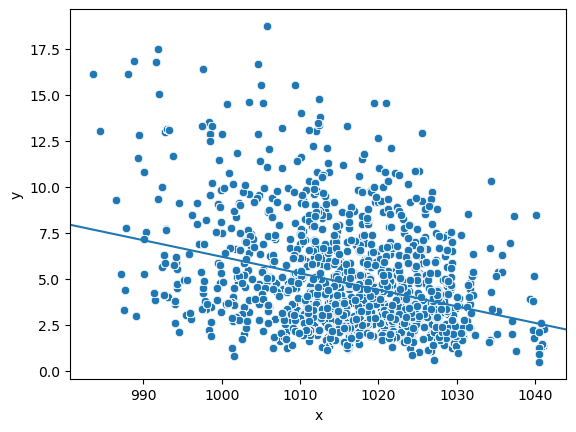

In [112]:
ax = sns.scatterplot(x=df.x, y=df.y)
sm.graphics.abline_plot(model_results=model, ax=ax)
plt.show()